In [15]:
from google.colab import files
uploaded = files.upload()

Saving disney_movies_total_gross.csv to disney_movies_total_gross (1).csv


**Introduction**
This notebook is for EDA and Data storytelling on the Disney Movie Gross Income Dataset. We will see all the trends of Disney Movies and how their genre, rating affect their performance

In [16]:
#Importing liabrarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

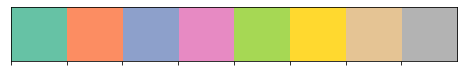

In [17]:
color_pallet = sns.color_palette(palette='Set2')
sns.palplot(color_pallet)
plt.show()

In [ ]:
#EDA
df = pd.read_csv('disney_movies_total_gross.csv')

In [18]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<1950
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<1950
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<1950
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<1950
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2010-2020
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2010-2020
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2010-2020
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2010-2020


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   movie_title               579 non-null    object        
 1   release_date              579 non-null    datetime64[ns]
 2   genre                     579 non-null    object        
 3   mpaa_rating               579 non-null    object        
 4   total_gross               579 non-null    int64         
 5   inflation_adjusted_gross  579 non-null    int64         
 6   decade                    579 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 31.8+ KB


In [20]:
df = df.fillna("NaN")

In [21]:
#feature engineering
df['release_date'] = pd.to_datetime(df['release_date'])

In [22]:
lis=[]
for i in range(579):
    if df['release_date'][i].year > 2010:
        lis.append('2010-2020')
    elif df['release_date'][i].year <= 2010 and df['release_date'][i].year > 2000:
        lis.append('2000-2010')
    elif df['release_date'][i].year <= 2000 and df['release_date'][i].year > 1990:
        lis.append('1990-2000')
    elif df['release_date'][i].year <= 1990 and df['release_date'][i].year > 1980:
        lis.append('1980-1990')
    elif df['release_date'][i].year <= 1980 and df['release_date'][i].year > 1970:
        lis.append('1970-1980')
    elif df['release_date'][i].year <= 1970 and df['release_date'][i].year > 1960:
        lis.append('1960-1970')
    elif df['release_date'][i].year <= 1960 and df['release_date'][i].year > 1950:
      lis.append('1950-1960')
    else:
        lis.append('<1950')
df['decade'] = lis

In [23]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<1950
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<1950
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<1950
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<1950
...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2010-2020
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2010-2020
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2010-2020
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2010-2020


In [24]:
#Visualization of trends using variable release_date
fig = px.scatter(df, x='release_date', y="total_gross",template='plotly_dark',title='Which genre grossed more over the years?',color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()

In [25]:
fig = px.scatter(df, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='Which genre grossed more after inflation over the years?',color='genre')
fig.data[0].line.color = 'limegreen'
fig.show()

In [26]:
fig = px.scatter(df, x='release_date', y="total_gross",template='plotly_dark',title='Which MPAA-rated movie grossed more over the years?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()

In [27]:
fig = px.scatter(df, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='Which MPAA-rated movie grossed more after inflation over the years?',color='mpaa_rating')
fig.data[0].line.color = 'limegreen'
fig.show()

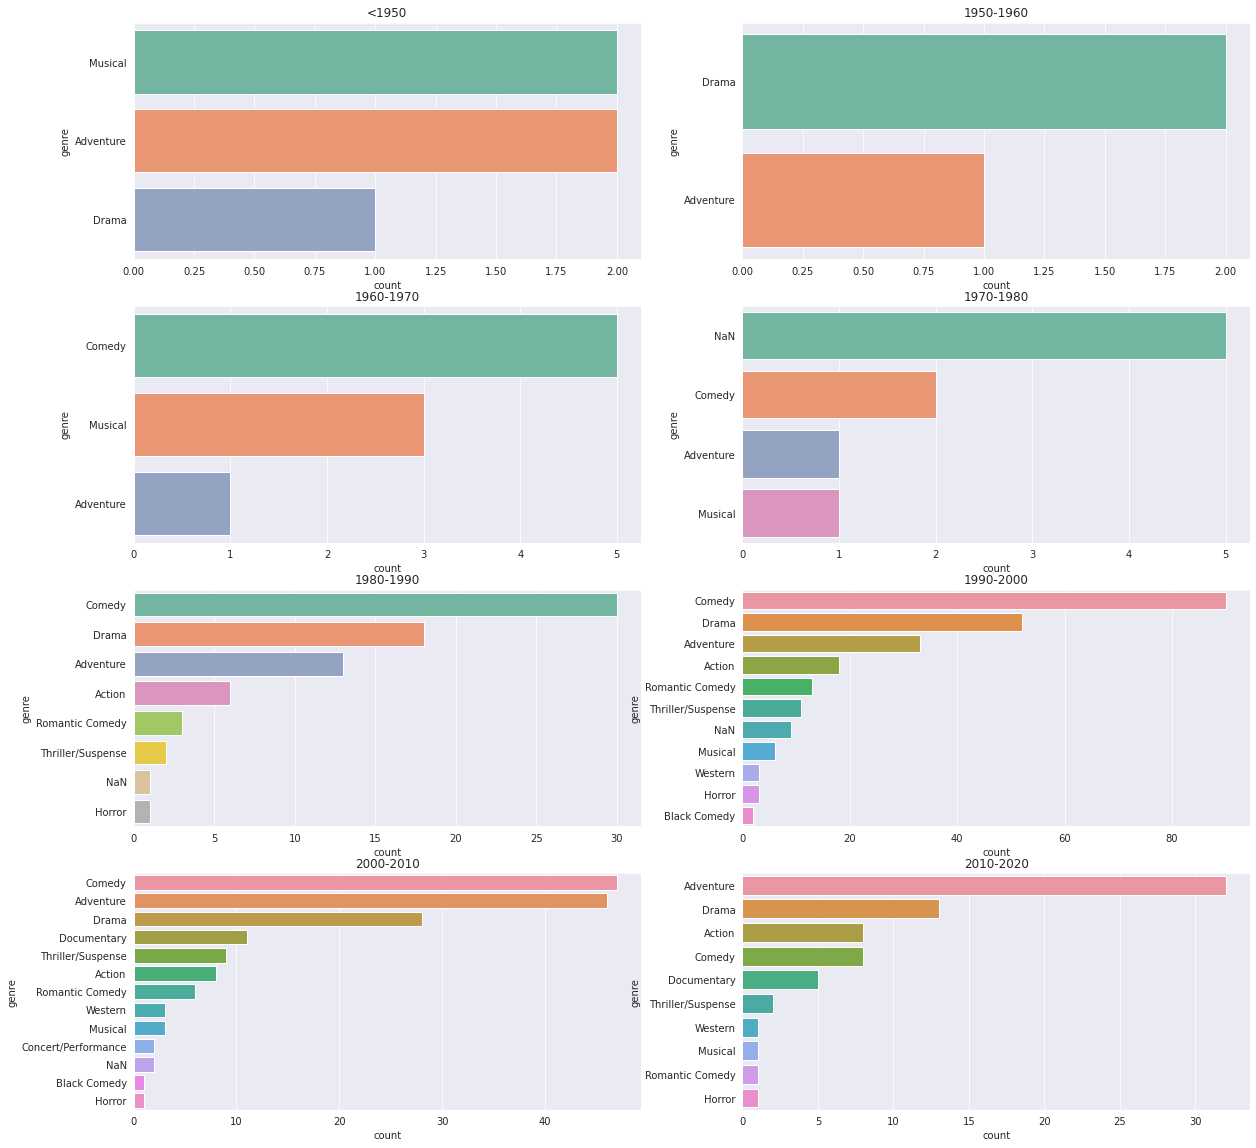

In [28]:
#Let's use the Decade variable for further trend analysis
decade_lis =  df['decade'].unique()
sns.set_style('darkgrid')
fig,axes = plt.subplots(4,2,figsize=(20,20))
axes = axes.flatten()
sns.set_palette('Set2')
for i in range(len(decade_lis)):
    ax = sns.countplot(y='genre',data=df[df['decade']==decade_lis[i]],ax=axes[i],order=df[df['decade']==decade_lis[i]]['genre'].value_counts().index)
    ax.set_title(decade_lis[i])
    fig.show()
plt.show()

In [29]:
movies_francise_list = []
lis = df['movie_title']
for i in lis:
    a = re.search(r'Cars|Star Wars|Pirate|Prince of|Avengers|Captain America|Thor|Doctor Strange|Muppets|Toy Story|Ant Man|Guardian|Iron Man',i)
    if a:
        movies_francise_list.append(i)
movies_name=['Cars','Star Wars','Pirates of the Caribbean','Prince of Persia','Toy Story','Muppets']
marvel = ['Avengers','Captain America','Thor','Doctor Strange','Iron Man','Guardians']
df['movie_francise'] = 'None'

In [30]:
def movies_francise(movies_name_list,replace_with_name_in_list=True,name=''):
    for i in movies_francise_list:
        for k in range(len(df)):
            if df['movie_title'][k] ==i:
                for j in movies_name_list:
                    a= re.search(j,i)
                    if a:
                        if replace_with_name_in_list:
                            df['movie_francise'][k] = j
                        else:
                            df['movie_francise'][k] = name
movies_francise(movies_name)
movies_francise(marvel,False,'Marvel')
df_movie_francise = df[df['movie_francise'] != 'None']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
df

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,decade,movie_francise
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,<1950,None
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,<1950,None
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,<1950,None
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579,<1950,None
4,Cinderella,1950-02-15,Drama,G,85000000,920608730,<1950,None
...,...,...,...,...,...,...,...,...
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979,2010-2020,None
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389,2010-2020,None
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923,2010-2020,Marvel
577,Moana,2016-11-23,Adventure,PG,246082029,246082029,2010-2020,None


In [32]:
fig = px.scatter(df_movie_francise, x='release_date', y="total_gross",template='plotly_dark',title='Movies Francises Performance over the years',color='movie_francise')
fig.data[0].line.color = 'limegreen'
fig.show()

In [33]:
fig = px.scatter(df_movie_francise, x='release_date', y="inflation_adjusted_gross",template='plotly_dark',title='Movies Francises Performance after the inflation over the years',color='movie_francise')
fig.data[0].line.color = 'limegreen'
fig.show()

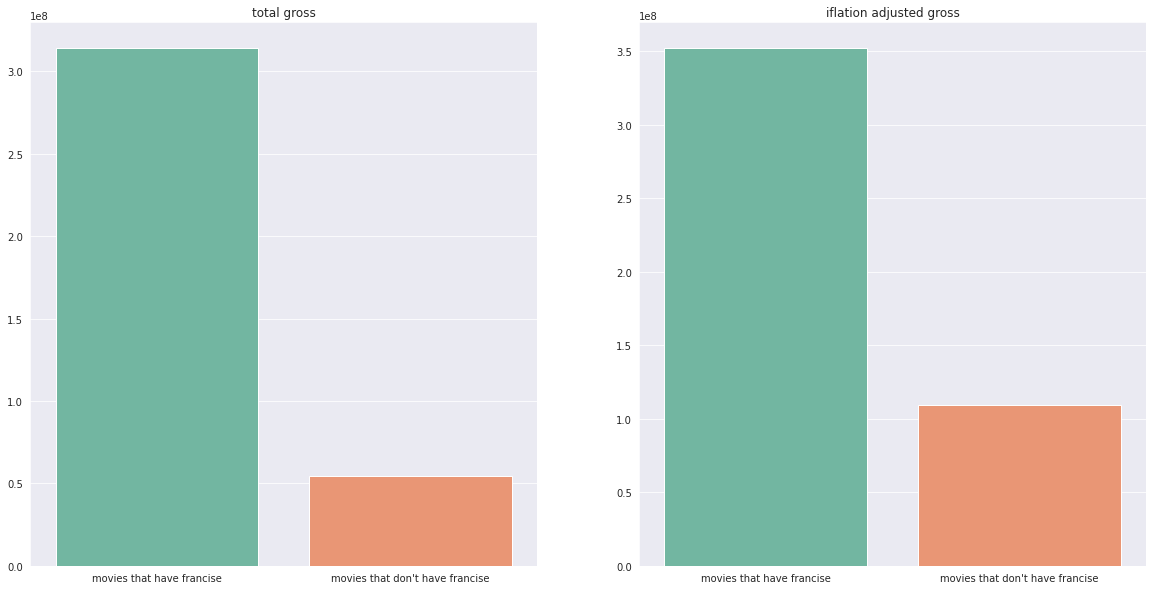

In [34]:
fig, ax= plt.subplots(1,2,figsize=(20,10))
y=[]
y.append(np.sum(df[df['movie_francise'] !='None']['total_gross'])/len(df[df['movie_francise'] !='None']['total_gross']))
y.append(np.sum(df[df['movie_francise'] =='None']['total_gross'])/len(df[df['movie_francise'] =='None']['total_gross']))
x=["movies that have francise","movies that don't have francise"]
fig1 = sns.barplot(x=x,y=y,ax=ax[0])
fig1.set_title('total gross')
y=[]
y.append(np.sum(df[df['movie_francise'] !='None']['inflation_adjusted_gross'])/len(df[df['movie_francise'] !='None']['inflation_adjusted_gross']))
y.append(np.sum(df[df['movie_francise'] =='None']['inflation_adjusted_gross'])/len(df[df['movie_francise'] =='None']['inflation_adjusted_gross']))
x=["movies that have francise","movies that don't have francise"]
fig2 = sns.barplot(x=x,y=y,ax=ax[1])
fig2.set_title('iflation adjusted gross')
plt.show()

**Conclusion**
📌In recent years Disney is making more movies compared to earlier
📌the total gross of recent movies are more compared to old movies but if we see inflated gross then old movies performed better
📌with time Disney seemed to try new movies market and seemed to make movies in almost all genre
📌Disney seemed to focus on making comedy movies for the last few Decades but recently they have started to focus more on the adventure/action genre which works best for them probably due to acquiring large production companies like Lucasfilm and Marvel Studios